In [ ]:
!pip install pandas numpy scikit-learn matplotlib seaborn

In [ ]:
# Anvesh Khode
# PRN: 22070521021
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import seaborn as sns

In [ ]:
df = pd.read_csv('./student_scores.csv')

df.columns = ['Hours_Studied', 'Test_Score']

print("Dataset Loaded Successfully.")
print("\nFirst 5 rows of the data:")
print(df.head())
print("\nData Info:")
print(df.info())

Dataset Loaded Successfully.

First 5 rows of the data:
   Hours_Studied  Test_Score
0            2.5          21
1            5.1          47
2            3.2          27
3            8.5          75
4            3.5          30

Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Hours_Studied  25 non-null     float64
 1   Test_Score     25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 532.0 bytes
None


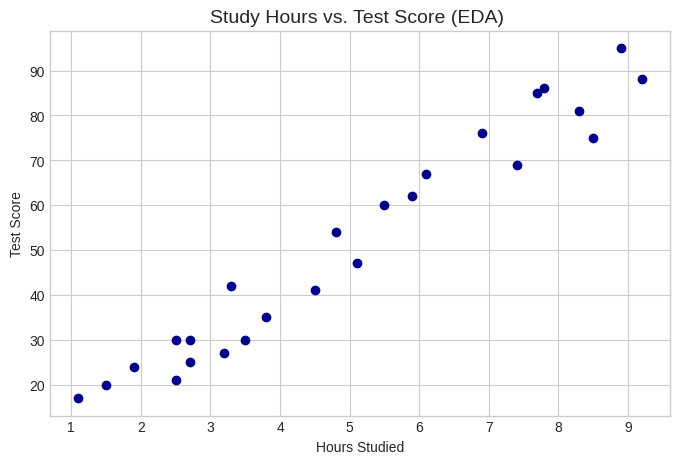

Total Samples: 25
Training Samples: 20
Testing Samples: 5


In [ ]:
plt.style.use('seaborn-v0_8-whitegrid')
plt.figure(figsize=(8, 5))
plt.scatter(df['Hours_Studied'], df['Test_Score'], color='darkblue')
plt.title('Study Hours vs. Test Score (EDA) ', fontsize=14)
plt.xlabel('Hours Studied')
plt.ylabel('Test Score')
plt.show()

X = df[['Hours_Studied']]
y = df['Test_Score']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print(f"Total Samples: {len(df)}")
print(f"Training Samples: {len(X_train)}")
print(f"Testing Samples: {len(X_test)}")

In [ ]:
model = LinearRegression()
model.fit(X_train, y_train)
coefficient = model.coef_[0]
intercept = model.intercept_
print("--- Linear Regression Model Parameters ---")
print(f"Coefficient (m, Slope): {coefficient:.2f}")
print(f"Intercept (c): {intercept:.2f}")
print("\nRegression Line Equation (y = mx + c):")
print(f"Test_Score = {coefficient:.2f} * Hours_Studied + {intercept:.2f}")

--- Linear Regression Model Parameters ---
Coefficient (m, Slope): 9.68
Intercept (c): 2.83

Regression Line Equation (y = mx + c):
Test_Score = 9.68 * Hours_Studied + 2.83


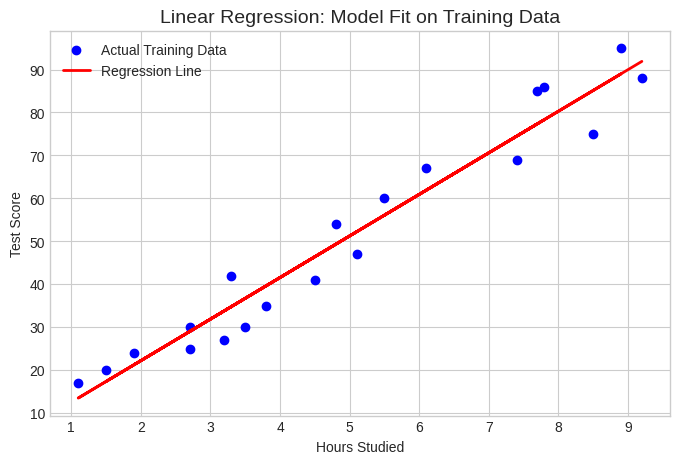

In [ ]:
plt.figure(figsize=(8, 5))
plt.scatter(X_train, y_train, color='blue', label='Actual Training Data')

# Plot the predicted line (y_predicted = m*X_train + c)
plt.plot(X_train, model.predict(X_train), color='red', linewidth=2, label='Regression Line')

plt.title('Linear Regression: Model Fit on Training Data', fontsize=14)
plt.xlabel('Hours Studied')
plt.ylabel('Test Score')
plt.legend()
plt.show()

--- Model Performance Metrics on Test Set ---
Mean Absolute Error (MAE): 3.92
Mean Squared Error (MSE): 18.94
Root Mean Squared Error (RMSE): 4.35
R-squared Score (R2): 0.9678


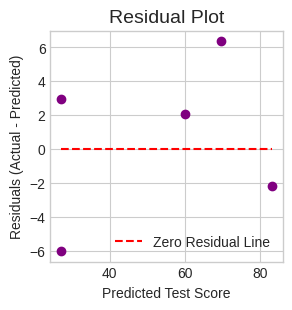

In [ ]:
y_pred = model.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("--- Model Performance Metrics on Test Set ---")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"R-squared Score (R2): {r2:.4f}")

residuals = y_test - y_pred

plt.figure(figsize=(3, 3))
plt.scatter(y_pred, residuals, color='purple')
plt.hlines(y=0, xmin=y_pred.min(), xmax=y_pred.max(), colors='red', linestyles='--', label='Zero Residual Line')
plt.title('Residual Plot', fontsize=14)
plt.xlabel('Predicted Test Score')
plt.ylabel('Residuals (Actual - Predicted)')
plt.legend()
plt.show()